In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


### Reading data set

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Preprocessing data
### Normalization

In [3]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [7]:
df_norm = norm_func(crime.iloc[:,1:])  
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# K-Means clustering
### Elbow curve

C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


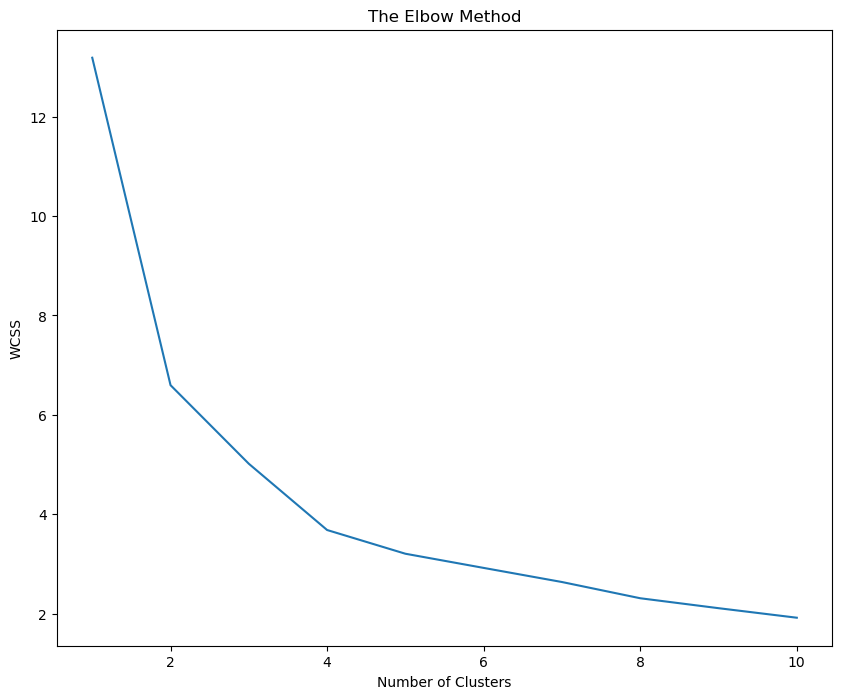

In [8]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) 
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [9]:
clf = KMeans(n_clusters=5)    #from the curve we considered no.of clusters = 5
y_kmeans = clf.fit_predict(df_norm)  

In [10]:
clf.labels_ 

array([4, 1, 1, 3, 1, 1, 0, 3, 1, 4, 0, 2, 1, 3, 2, 3, 3, 4, 2, 1, 0, 1,
       2, 4, 3, 3, 3, 1, 2, 0, 1, 1, 4, 2, 0, 3, 3, 0, 0, 4, 2, 4, 1, 0,
       2, 3, 0, 2, 2, 3])

In [11]:
y_kmeans

array([4, 1, 1, 3, 1, 1, 0, 3, 1, 4, 0, 2, 1, 3, 2, 3, 3, 4, 2, 1, 0, 1,
       2, 4, 3, 3, 3, 1, 2, 0, 1, 1, 4, 2, 0, 3, 3, 0, 0, 4, 2, 4, 1, 0,
       2, 3, 0, 2, 2, 3])

In [12]:
clf.cluster_centers_

array([[0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.37198795, 0.35416667, 0.51412429, 0.32235142],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388]])

In [13]:
clf.inertia_

3.1831577316766544

In [14]:
md=pd.Series(y_kmeans)
crime['clust']=md 
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,4


In [15]:
### Clusters mean
crime.iloc[:,1:7].groupby(crime.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.955556,125.444444,80.111111,17.788889,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,2.680000,70.100000,51.000000,10.910000,2.0
3,6.975000,148.416667,62.333333,19.775000,3.0
4,14.671429,251.285714,54.285714,21.685714,4.0


### Plotting clusters

Text(0.5, 1.0, 'Clusters using KMeans')

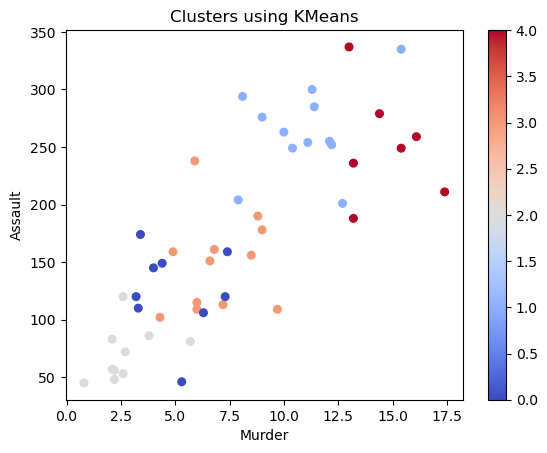

In [19]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [ ]:
### since the  ckusters are not homogenous for n=5 experimenting with clusters=6

In [27]:
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(df_norm)  

Text(0.5, 1.0, 'Clusters using KMeans')

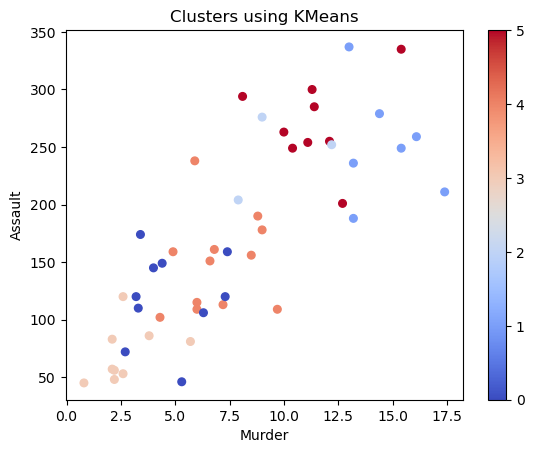

In [30]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [31]:
### Experimenting with clusters=4
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(df_norm)  

Text(0.5, 1.0, 'Clusters using KMeans')

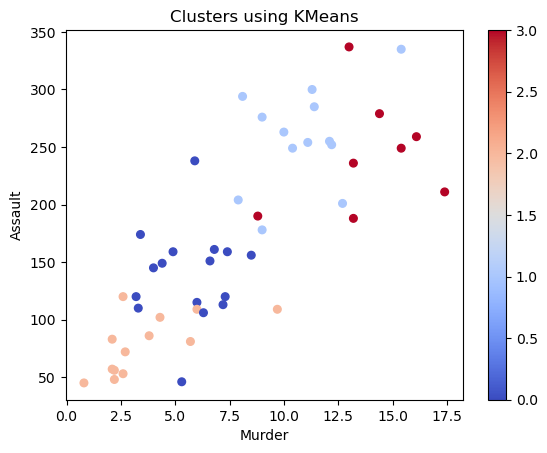

In [32]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [50]:
### Experimenting with clusters=3
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(df_norm) 

Text(0.5, 1.0, 'Clusters using KMeans')

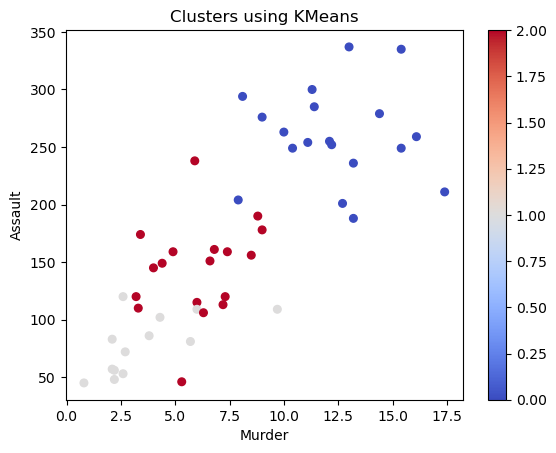

In [51]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [52]:
clf.labels_ 

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [53]:
y_kmeans

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [54]:
md=pd.Series(y_kmeans)
crime['clust']=md 
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [55]:
crime.iloc[:,1:7].groupby(crime.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,12.331579,259.315789,68.315789,29.215789,0.0
1,3.600000,78.538462,52.076923,12.176923,1.0
2,6.016667,143.888889,72.333333,19.344444,2.0


In [56]:
WCSS

[13.184122550256445,
 6.596893867946196,
 5.016388924690672,
 3.683456153585914,
 3.2062938623692707,
 2.9211697794492673,
 2.6373060314472756,
 2.3107736124519143,
 2.111022874503586,
 1.9190699377909974]